<a href="https://colab.research.google.com/github/ApoorvaReddy17/practice/blob/main/RAG_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retrieval-Augmented Generation (RAG)**

# simple rag model -- text to text model

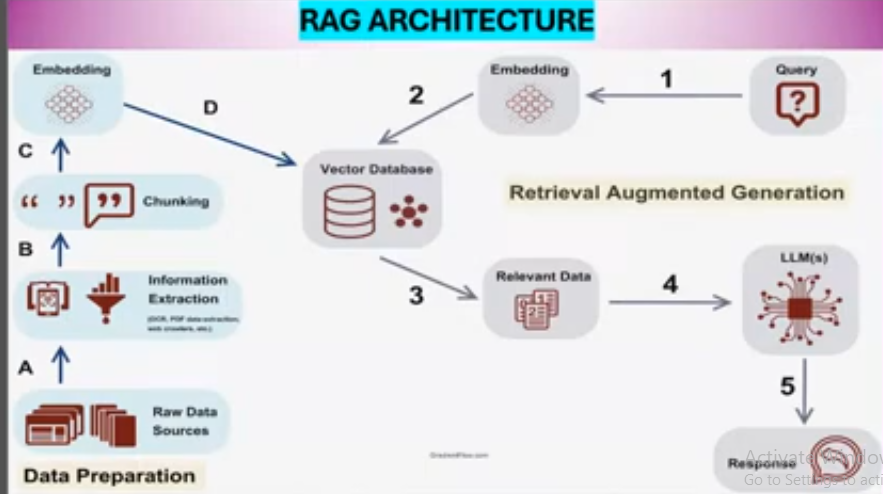

Framework: **LANGCHAIN**

LLM MODEL - **llama-3.1-8b-instant**

LPU = **GROQ API**

**HUGGING FACE**


In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

## **10. created a requirment.txt**

chromadb == 0.5.5

langchain-chroma==0.1.2

langchain==0.2.11

langchain-community==0.2.10

langchain-text-splitters==0.2.2

langchain-groq==0.1.6

transformers==4.43.2

sentence-transformers==3.0.1

unstructured==0.15.0

unstructured[pdf]==0.15.0

In [2]:
# !pip install -r requirment.txt

In [3]:
import os
from langchain.document_loaders import UnstructuredFileIOLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from langchain_groq import ChatGroq
from langchain.chains import RetrievalQA


groq api key


name: apoorva_groq

s_key: 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

In [4]:
os.environ["GROQ_API_KEY"]="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"

In [5]:
# fetch the pdf from url
import requests
url="https://dspmuranchi.ac.in/pdf/Blog/Python%20Built-In%20Functions.pdf"

In [6]:
# save the pdf in local file
with open("python_functions.pdf","wb") as f:
  f.write(requests.get(url).content)

In [7]:

#!pip install --upgrade unstructured
#!pip install --upgrade pdfminer.six
#!pip install pi_heif


In [8]:
# load the document
with open ("python_functions.pdf","rb") as f:
  loader = UnstructuredFileIOLoader(file=f)
  documents = loader.load()
documents

[Document(page_content='Python Built-In Functions\n\nGaurav Kr. suman\n\nMIT5\n\n1. abs()\n\nThe abs() is one of the most popular Python built-in functions, which returns the absolute value of a number. A negative value’s absolute is that value is positive.\n\n>>> abs(-7)\n\n7\n\n>>> abs(7)\n\n7\n\n>>> abs(0)\n\n2. all()\n\nThe all() function takes a container as an argument. This Built in Functions returns True if all values in a python iterable have a Boolean value of True. An empty value has a Boolean value of False.\n\n>>> all({\'*\',\'\',\'\'})\n\nFalse\n\n>>> all([\' \',\' \',\' \'])\n\nTrue\n\n3. any()\n\nLike all(), it takes one argument and returns True if, even one value in the iterable has a Boolean value of True.\n\n>>> any((1,0,0))\n\nTrue\n\n>>> any((0,0,0))\n\nFalse\n\n4. ascii()\n\nIt is important Python built-in functions, returns a printable representation of a python object (like a string or a Python list). Let’s take a Romanian character.\n\n1 | P a g e\n\n>>> ascii

In [9]:
documents

[Document(page_content='Python Built-In Functions\n\nGaurav Kr. suman\n\nMIT5\n\n1. abs()\n\nThe abs() is one of the most popular Python built-in functions, which returns the absolute value of a number. A negative value’s absolute is that value is positive.\n\n>>> abs(-7)\n\n7\n\n>>> abs(7)\n\n7\n\n>>> abs(0)\n\n2. all()\n\nThe all() function takes a container as an argument. This Built in Functions returns True if all values in a python iterable have a Boolean value of True. An empty value has a Boolean value of False.\n\n>>> all({\'*\',\'\',\'\'})\n\nFalse\n\n>>> all([\' \',\' \',\' \'])\n\nTrue\n\n3. any()\n\nLike all(), it takes one argument and returns True if, even one value in the iterable has a Boolean value of True.\n\n>>> any((1,0,0))\n\nTrue\n\n>>> any((0,0,0))\n\nFalse\n\n4. ascii()\n\nIt is important Python built-in functions, returns a printable representation of a python object (like a string or a Python list). Let’s take a Romanian character.\n\n1 | P a g e\n\n>>> ascii

In [10]:
text_splitter = CharacterTextSplitter(chunk_size =2000, chunk_overlap = 200)

In [11]:
text_splitter


In [12]:
texts = text_splitter.split_documents(documents)


In [13]:
type(texts)

list

In [14]:
texts[2]

Document(page_content='12. compile()\n\ncompile() returns a Python code object. We use Python in built function to convert a string code into object code.\n\n>>> exec(compile(\'a=5\\nb=7\\nprint(a+b)\',\'\',\'exec\'))\n\n12\n\nHere, ‘exec’ is the mode. The parameter before that is the filename for the file form which the code is read. Finally, we execute it using exec().\n\n13. complex()\n\ncomplex() function creates a complex number. We have seen this is our article on Python Numbers.\n\n>>> complex(3)\n\n(3+0j)\n\n5 | P a g e\n\n>>> complex(3.5)\n\n(3.5+0j)\n\n>>> complex(3+5j)\n\n(3+5j)\n\n14. delattr()\n\ndelattr() takes two arguments- a class, and an attribute in it. It deletes the attribute.\n\n>>> class fruit:\n\nsize=7\n\n>>> orange=fruit()\n\n>>> orange.size\n\n7\n\n>>> delattr(fruit,\'size\')\n\n>>> orange.size\n\nTraceback (most recent call last):\n\nFile “<pyshell#95>”, line 1, in <module>\n\norange.size\n\nAttributeError: ‘fruit’ object has no attribute ‘size’\n\n15. dict(

In [15]:
embeddings = HuggingFaceEmbeddings()

<ipython-input-15-d0c9174021d8>:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings()
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [16]:
persist_directory = "vector_db"

In [17]:
vectordb = Chroma.from_documents(   documents=texts,
                                    embedding=embeddings,
                                    persist_directory=persist_directory)

In [18]:
# retrival
retriver = vectordb.as_retriever()

In [19]:
llm = ChatGroq(model = "llama-3.1-8b-instant", temperature=0)

In [20]:
qa_chain = RetrievalQA.from_chain_type(llm=llm,
                                       chain_type="stuff",
                                       retriever=retriver,
                                       return_source_documents=True)


In [21]:
query = "what are the inbuild function from this pdf"
response = qa_chain({"query": query})


<ipython-input-21-bba95a47edb0>:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  response = qa_chain({"query": query})


In [22]:
print(response)
response

{'query': 'what are the inbuild function from this pdf', 'result': 'Based on the provided context, the following are the built-in functions mentioned in the PDF:\n\n1. `exec()`\n2. `complex()`\n3. `print()`\n4. `hasattr()`\n5. `hash()`\n6. `hex()`\n7. `id()`\n8. `input()`\n9. `int()`\n10. `isinstance()`\n11. `ord()`\n12. `pow()`\n13. `range()`\n14. `compile()`\n15. `delattr()`\n16. `dict()`\n17. `divmod()`\n18. `enumerate()`\n19. `eval()`\n20. `filter()`\n\nAdditionally, the following functions are mentioned but not explicitly listed as built-in functions:\n\n1. `chr()` (mentioned as complementary to `ord()`)\n2. `input()` (mentioned as returning a string, and requiring `int()` to convert to an integer)', 'source_documents': [Document(page_content='12\n\nHere, ‘exec’ is the mode. The parameter before that is the filename for the file form which the code is read. Finally, we execute it using exec().\n\n13. complex()'), Document(page_content='>>> pow(7,-2)\n\n0.02040816326530612\n\n35. p

{'query': 'what are the inbuild function from this pdf',
 'result': 'Based on the provided context, the following are the built-in functions mentioned in the PDF:\n\n1. `exec()`\n2. `complex()`\n3. `print()`\n4. `hasattr()`\n5. `hash()`\n6. `hex()`\n7. `id()`\n8. `input()`\n9. `int()`\n10. `isinstance()`\n11. `ord()`\n12. `pow()`\n13. `range()`\n14. `compile()`\n15. `delattr()`\n16. `dict()`\n17. `divmod()`\n18. `enumerate()`\n19. `eval()`\n20. `filter()`\n\nAdditionally, the following functions are mentioned but not explicitly listed as built-in functions:\n\n1. `chr()` (mentioned as complementary to `ord()`)\n2. `input()` (mentioned as returning a string, and requiring `int()` to convert to an integer)',
 'source_documents': [Document(page_content='12\n\nHere, ‘exec’ is the mode. The parameter before that is the filename for the file form which the code is read. Finally, we execute it using exec().\n\n13. complex()'),
  Document(page_content='>>> pow(7,-2)\n\n0.02040816326530612\n\n3

In [23]:
print(response["result"])

Based on the provided context, the following are the built-in functions mentioned in the PDF:

1. `exec()`
2. `complex()`
3. `print()`
4. `hasattr()`
5. `hash()`
6. `hex()`
7. `id()`
8. `input()`
9. `int()`
10. `isinstance()`
11. `ord()`
12. `pow()`
13. `range()`
14. `compile()`
15. `delattr()`
16. `dict()`
17. `divmod()`
18. `enumerate()`
19. `eval()`
20. `filter()`

Additionally, the following functions are mentioned but not explicitly listed as built-in functions:

1. `chr()` (mentioned as complementary to `ord()`)
2. `input()` (mentioned as returning a string, and requiring `int()` to convert to an integer)


In [24]:
# print(response["source_documents"][0].metadata["source"])
print(response["source_documents"][0].metadata.keys())

dict_keys([])


In [25]:
query = "give me summary of all function from this pdf?"
response = qa_chain({"query": query})
print(response["result"])
print("*"*30)
print(response["source_documents"])


Here's a summary of the built-in functions mentioned in the PDF:

1. **abs()**: Returns the absolute value of a number.
2. **pow()**: Returns the value of a number raised to a power.
3. **print()**: Prints the given argument to the console.
4. **range()**: Returns a sequence of numbers starting from a given number, stopping before a given number, and stepping by a given number.
5. **repr()**: Returns a string representation of an object.
6. **reversed()**: Returns an iterator that reverses the order of an iterable.
7. **round()**: Rounds a number to a given number of decimal places.
8. **set()**: Returns a set of unique elements from an iterable.
9. **setattr()**: Sets the value of an attribute for an object.
10. **hash()**: Returns the hash value of an object.
11. **hex()**: Converts an integer to a hexadecimal string.
12. **id()**: Returns the identity of an object (a unique integer).
13. **input()**: Reads a line of input from the user and returns it as a string.
14. **int()**: Conv

In [26]:
print("Source_documents:" , response["source_documents"][2])

Source_documents: page_content='>>> hasattr(orange,'size')

True

>>> hasattr(orange,'shape')

True

>>> hasattr(orange,'color')

False

27. hash()

hash() function returns the hash value of an object. And in Python, everything is an object.

>>> hash(orange)

6263677

9 | P a g e

>>> hash(orange)

6263677

>>> hash(True)

1

>>> hash(0)

0

>>> hash(3.7)

644245917

>>> hash(hash)

25553952

28. hex()

Hex() Python built-in functions, converts an integer to hexadecimal.

>>> hex(16)

‘0x10’

>>> hex(False)

‘0x0’

29. id() Function

id() returns an object’s identity.

>>> id(orange)

100218832

>>> id({1,2,3})==id({1,3,2})

True

30. input()

Input() Python built-in functions, reads and returns a line of string.

>>> input("Enter a number")

Enter a number7 ‘7’

10 | P a g e

Note that this returns the input as a string. If we want to take 7 as an integer, we need to apply the int() function to it.

>>> int(input("Enter a number"))

Enter a number7

7

31. int()

int() converts a val

In [27]:
print(response["source_documents"][2].metadata.keys())

dict_keys([])


In [29]:
# print(response["source_documents"][2].metadata["source"])